In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os 
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.1.0
sys.version_info(major=3, minor=7, micro=5, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.17.4
pandas 0.25.3
sklearn 0.21.3
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


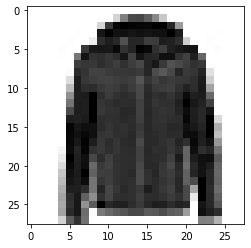

In [4]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")
    plt.show()
    
show_single_image(x_train[0])

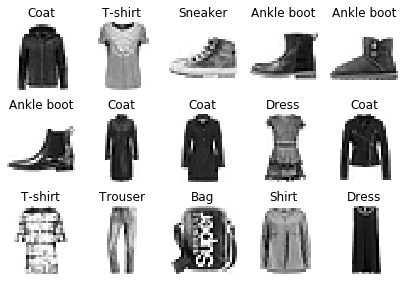

In [5]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_name):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize=(n_cols*1.4, n_rows*1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap="binary", interpolation='nearest')
            plt.axis('off')
            plt.title(class_name[y_data[index]])

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
              'Coat', 'Sandal', 'Shirt', 'Sneaker',
              'Bag', 'Ankle boot']
show_imgs(3, 5, x_train, y_train, class_names)

In [6]:
# tf.keras.Sequential()
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# relu: y = max(0, x)
# softmax: 将向量变成概率分布

model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])


In [7]:
model.layers

In [8]:
# 显示模型层数 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 79us/sample - loss: 56173647424795040.0000 - accuracy: 0.0973 - val_loss: 2.3317 - val_accuracy: 0.0986
Epoch 2/10
55000/55000 [==============================] - 4s 79us/sample - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3317 - val_accuracy: 0.0914
Epoch 3/10
55000/55000 [==============================] - 4s 79us/sample - loss: 2.3026 - accuracy: 0.1006 - val_loss: 2.3319 - val_accuracy: 0.0914
Epoch 4/10
55000/55000 [==============================] - 4s 79us/sample - loss: 2.3027 - accuracy: 0.1009 - val_loss: 2.3319 - val_accuracy: 0.0914
Epoch 5/10
55000/55000 [==============================] - 5s 83us/sample - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3318 - val_accuracy: 0.1008
Epoch 6/10
55000/55000 [==============================] - 5s 86us/sample - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3318 - val_accuracy: 0.1008
Epoch 7/10
55000/55000 [=================

In [10]:
history.history

{'loss': [5.617364742479503e+16,
  2.302709901185469,
  2.302647510216453,
  2.302681624395197,
  2.30267818107605,
  2.3026842561201617,
  2.3026943729400635,
  2.302681692262129,
  2.30269471282959,
  2.3026928349928424],
 'accuracy': [0.09732727,
  0.09834545,
  0.10063636,
  0.100854546,
  0.097763635,
  0.09949091,
  0.09890909,
  0.10118182,
  0.09914546,
  0.09830909],
 'val_loss': [2.3316740516662597,
  2.331746419906616,
  2.331871607208252,
  2.3318667781829836,
  2.331783438873291,
  2.3317658966064454,
  2.3317723670959474,
  2.3317523666381836,
  2.3319172927856444,
  2.331950826263428],
 'val_accuracy': [0.0986,
  0.0914,
  0.0914,
  0.0914,
  0.1008,
  0.1008,
  0.0914,
  0.098,
  0.0914,
  0.0914]}

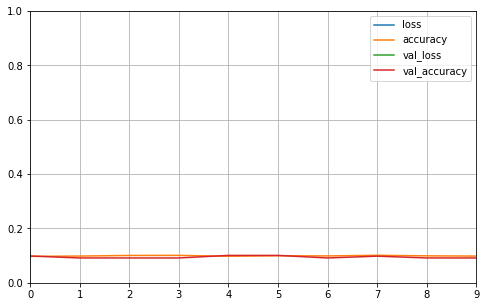

In [16]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

In [13]:
# normalize 归一化数据
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1, 28, 28)

In [14]:
print(np.max(x_train_scaled), np.min(x_train_scaled))

2.0231433 -0.8105136


In [22]:
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 73us/sample - loss: nan - accuracy: 0.1007 - val_loss: nan - val_accuracy: 0.0914
Epoch 2/10
55000/55000 [==============================] - 4s 80us/sample - loss: nan - accuracy: 0.1008 - val_loss: nan - val_accuracy: 0.0914
Epoch 3/10
55000/55000 [==============================] - 4s 81us/sample - loss: nan - accuracy: 0.1008 - val_loss: nan - val_accuracy: 0.0914
Epoch 4/10
55000/55000 [==============================] - 4s 80us/sample - loss: nan - accuracy: 0.1008 - val_loss: nan - val_accuracy: 0.0914
Epoch 5/10
55000/55000 [==============================] - 4s 81us/sample - loss: nan - accuracy: 0.1008 - val_loss: nan - val_accuracy: 0.0914
Epoch 6/10
55000/55000 [==============================] - 4s 82us/sample - loss: nan - accuracy: 0.1008 - val_loss: nan - val_accuracy: 0.09143s - loss
Epoch 7/10
55000/55000 [==============================] - 4s 80us/sample - loss: nan

In [1]:
model.evaluate(x_test_scaled, y_test)

NameError: name 'model' is not defined

---

### DNN

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="relu"))
    # model.add(keras.layers.Dense(100, activation="selu"))
    model.add(keras.layers.BatchNormalization())
    """
    model.add(keras.layers.Dense(100))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("relu"))
    """
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [19]:
model.layers

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               78500     
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_23 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)              

In [21]:
logdir = "./dnn-callbacks"
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir, "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)
]
history = model.fit(x_train_scaled, y_train, 
                      epochs=10, 
                      validation_data=(x_valid_scaled, y_valid),
                      callbacks = callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 19s 347us/sample - loss: 1.0503 - accuracy: 0.6286 - val_loss: 0.6121 - val_accuracy: 0.7768
Epoch 2/10
55000/55000 [==============================] - 14s 258us/sample - loss: 0.7356 - accuracy: 0.7374 - val_loss: 0.5200 - val_accuracy: 0.8114
Epoch 3/10
55000/55000 [==============================] - 15s 272us/sample - loss: 0.6380 - accuracy: 0.7723 - val_loss: 0.4973 - val_accuracy: 0.8194
Epoch 4/10
55000/55000 [==============================] - 15s 268us/sample - loss: 0.5780 - accuracy: 0.7981 - val_loss: 0.4576 - val_accuracy: 0.8334
Epoch 5/10
55000/55000 [==============================] - 14s 259us/sample - loss: 0.5374 - accuracy: 0.8105 - val_loss: 0.4346 - val_accuracy: 0.8466
Epoch 6/10
55000/55000 [==============================] - 15s 270us/sample - loss: 0.5082 - accuracy: 0.8207 - val_loss: 0.4155 - val_accuracy: 0.8510
Epoch 7/10
55000/55000 [=====================

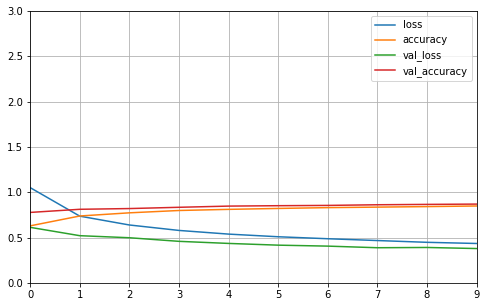

In [22]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,3)
    plt.show()
    
plot_learning_curves(history)

In [23]:
model.evaluate(x_test_scaled, y_test)

10000/10000 [==============================] - 1s 96us/sample - loss: 0.4184 - accuracy: 0.8533


[0.41839749798774717, 0.8533]

---

In [24]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
for _ in range(20):
    #model.add(keras.layers.Dense(100, activation="relu"))
    #model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(100, activation="selu"))

    """
    model.add(keras.layers.Dense(100))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("relu"))
    """
model.add(keras.layers.AlphaDropout(rate=0.5))
#model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [26]:
model.summaryary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_43 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_44 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_45 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_46 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_47 (Dense)             (None, 100)              

In [25]:
callbacks = [
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)
]
history = model.fit(x_train_scaled, y_train, 
                      epochs=10, 
                      validation_data=(x_valid_scaled, y_valid),
                      callbacks = callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 130us/sample - loss: 0.6829 - accuracy: 0.7691 - val_loss: 0.6474 - val_accuracy: 0.8474
Epoch 2/10
55000/55000 [==============================] - 7s 124us/sample - loss: 0.4568 - accuracy: 0.8423 - val_loss: 0.6563 - val_accuracy: 0.8492
Epoch 3/10
55000/55000 [==============================] - 6s 113us/sample - loss: 0.4004 - accuracy: 0.8586 - val_loss: 0.5768 - val_accuracy: 0.8608
Epoch 4/10
55000/55000 [==============================] - 6s 102us/sample - loss: 0.3740 - accuracy: 0.8690 - val_loss: 0.5283 - val_accuracy: 0.8768
Epoch 5/10
55000/55000 [==============================] - 6s 105us/sample - loss: 0.3499 - accuracy: 0.8786 - val_loss: 0.5242 - val_accuracy: 0.8756
Epoch 6/10
55000/55000 [==============================] - 6s 106us/sample - loss: 0.3335 - accuracy: 0.8804 - val_loss: 0.4725 - val_accuracy: 0.8780
Epoch 7/10
55000/55000 [===========================

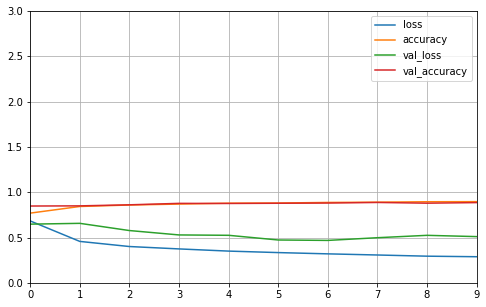

In [27]:
plot_learning_curves(history)

In [28]:
model.evaluate(x_test_scaled, y_test)

10000/10000 [==============================] - 1s 51us/sample - loss: 0.5550 - accuracy: 0.8747


[0.5550188265018166, 0.8747]